In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [87]:
df.shape

(20800, 5)

In [88]:
x = df.drop(['label'], axis=1)

In [89]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


<IPython.core.display.Javascript object>

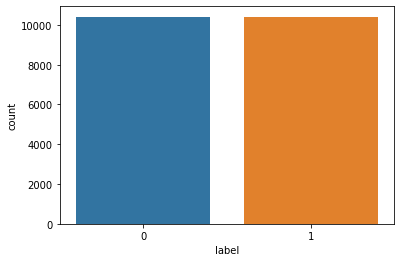

In [91]:
sns.countplot(x='label',data=df)

In [92]:
df.dropna(inplace=True)
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [93]:
messages = df.copy()

In [94]:
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [95]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [96]:
import re

In [97]:
stemmer = PorterStemmer()
corpus=[]

In [98]:
messages.shape[0]

18285

In [99]:
messages.title[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [100]:
for i in range(0,messages.shape[0]):
    message = re.sub('[^a-zA-Z]',' ', messages.title[i])
    message = message.lower()
    message = message.split()
    message = [stemmer.stem(word) for word in message if not word in set(stopwords.words('english'))]
    message = ' '.join(message)
    corpus.append(message)

In [101]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [103]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [104]:
X.shape

(18285, 5000)

In [107]:
y = messages.label
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [108]:
y.shape

(18285,)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [110]:
cv.get_feature_names()[:20]

['aaron',
 'ab',
 'abandon',
 'abba',
 'abbott',
 'abc',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'aboard',
 'abolish',
 'abort',
 'abram',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abu',
 'abus']

In [111]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [113]:
X_train[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [117]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,aaron,ab,abandon,abba,abbott,abc,abduct,abe,abedin,abl,...,zero,zika,zimbabw,zionist,zip,zone,zoo,zu,zuckerberg,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [119]:
y_nb_pred = nb.predict(X_test) 

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,precision_score
score_nb = accuracy_score(y_test, y_nb_pred)
rc_nb = recall_score(y_test,y_nb_pred)
pc_nb = precision_score(y_test,y_nb_pred)

In [125]:
print("Accuracy Score: {}%".format(round(score_nb*100,2)))
print("Recall Score: {}%".format(round(rc_nb*100,2)))
print("Precision Score: {}%".format(round(pc_nb*100,2)))

Accuracy Score: 90.27%
Recall Score: 86.33%
Precision Score: 91.18%


In [126]:
cm_nb = confusion_matrix(y_test,y_nb_pred)
cm_nb

array([[1905,  135],
       [ 221, 1396]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

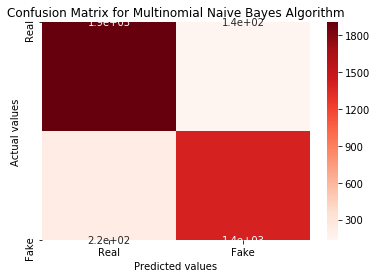

In [130]:
# Plotting the confusion matrix
sns.heatmap(data=cm_nb, annot=True, cmap="Reds", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [132]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.0,0.1):
    temp_nb = MultinomialNB(alpha=i)
    temp_nb.fit(X_train,y_train)
    temp_y_nb_pred = temp_nb.predict(X_test)
    temp_score_nb = accuracy_score(y_test,temp_y_nb_pred)
    print("Accuracy Score for alpha: {} is {}".format(round(i,1),round(temp_score_nb*100,2)))
    if temp_score_nb>best_accuracy:
        best_accuracy = temp_score_nb
        alpha_val=i
print('---------------------------------------------')
print('The best accuracy score is {} for alpha value {}'.format(round(best_accuracy*100,2),round(alpha_val,2)))

Accuracy Score for alpha: 0.1 is 89.86
Accuracy Score for alpha: 0.2 is 89.99
Accuracy Score for alpha: 0.3 is 90.13
Accuracy Score for alpha: 0.4 is 90.21
Accuracy Score for alpha: 0.5 is 90.24
Accuracy Score for alpha: 0.6 is 90.16
Accuracy Score for alpha: 0.7 is 90.16
Accuracy Score for alpha: 0.8 is 90.24
Accuracy Score for alpha: 0.9 is 90.21
---------------------------------------------
The best accuracy score is 90.24 for alpha value 0.5


## Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train,y_train)

LogisticRegression()

In [134]:
y_lor_pred = lor.predict(X_test)

In [135]:
score_lor = accuracy_score(y_test,y_lor_pred)
rs_lor = recall_score(y_test,y_lor_pred)
ps_lor = precision_score(y_test,y_lor_pred)

In [136]:
print("Accuracy Score: {}%".format(round(score_lor*100,2)))
print("Recall Score: {}%".format(round(rs_lor*100,2)))
print("Precision Score: {}%".format(round(ps_lor*100,2)))

Accuracy Score: 93.44%
Recall Score: 96.91%
Precision Score: 89.19%


In [137]:
cm_lor = confusion_matrix(y_test,y_lor_pred)
cm_lor

array([[1850,  190],
       [  50, 1567]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

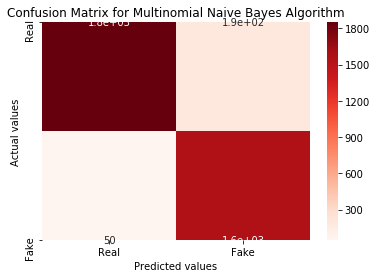

In [138]:
# Plotting the confusion matrix
sns.heatmap(data=cm_lor, annot=True, cmap="Reds", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [141]:
best_accuracy_lor = 0.0
C_val = 0.0
for i in np.arange(0.1,1.0,0.1):
    temp_lor = LogisticRegression(C=i,random_state=0)
    temp_lor.fit(X_train,y_train)
    temp_y_lor_pred = temp_lor.predict(X_test)
    temp_score_lor = accuracy_score(y_test,temp_y_lor_pred)
    print("Accuracy Score for C: {} is {}%".format(round(i,1),round(temp_score_lor*100,2)))
    if temp_score_lor>best_accuracy_lor:
        best_accuracy_lor = temp_score_lor
        C_val=i
print('---------------------------------------------')
print('The best accuracy score is {}% for C value {}'.format(round(best_accuracy_lor*100,2),round(C_val,2)))

Accuracy Score for C: 0.1 is 91.47%
Accuracy Score for C: 0.2 is 92.45%
Accuracy Score for C: 0.3 is 92.84%
Accuracy Score for C: 0.4 is 92.95%
Accuracy Score for C: 0.5 is 93.08%
Accuracy Score for C: 0.6 is 93.14%
Accuracy Score for C: 0.7 is 93.19%
Accuracy Score for C: 0.8 is 93.3%
Accuracy Score for C: 0.9 is 93.38%
---------------------------------------------
The best accuracy score is 93.38% for C value 0.9


# Hyperparameter tuning for Logistic Regression

In [149]:
logistic = LogisticRegression(C=0.9,random_state=0)
logistic.fit(X_train,y_train)

LogisticRegression(C=0.9, random_state=0)

In [150]:
y_pred = logistic.predict(X_test)

In [153]:
score = accuracy_score(y_test,y_pred)
print("Accuracy Score: {}%".format(round(score*100,2)))

Accuracy Score: 93.38%


## Prediction

In [154]:
def predict_fake_news(news):
    news = re.sub('[^a-zA-Z]', ' ', news)
    news = news.lower()
    news = news.split()
    news = [stemmer.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news = ' '.join(news)
    temp = cv.transform([news]).toarray()
    return logistic.predict(temp)

In [10]:
predict_df = pd.read_csv('test.csv')

In [157]:
title = predict_df['title']

In [158]:
title.shape

(5200,)

In [166]:
from random import randint
row = randint(0, title.shape[0]-1)
news = title[row]

print('News: {}'.format(news),'\n')
if predict_fake_news(news):
  print('Prediction: This is a Fake news!')
else:
  print('Prediction: This is a Real news.')

News: NORAD's Ability To Track Santa In Doubt 

Prediction: This is a Fake news!
